# Assignment 2


- Student Name: Karina Jonina
- Student ID: c00278440

- Module Name: Programming for Data Scientists
- Module Code: PROGC5201
- Module Leader: Paul Barry

- Course Name: 		Master of Science in Data Science
- Course Code:		 CW_KCDAR_M Y5

- Due Date: 26th November 2021 5pm

In [2]:
# Importing packages
import re
import json
import requests 
import codecs
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import numpy as np
import DBcm

# Create a database in SQL

### Data Dictionary

<br>
It was decided to create two different tables to collect the data to analyse for Question 3. Below is the description of each table schema.  

<br>


###### Prime Minister Table (pm_table)
| Attribute | DataType | Required | Description |
| :- | :-: | :-: | -: |
| pm_id | Numeric, Identity | Yes | Auto number from system, 1-infinity | 
| pm_name | varchar(55) | Yes | Name of the PM | 
| pm_link | varchar(100) | Yes | Link to the PM's individual wikipage |
| pm_dob | Date | Yes | PM's Date of Birth |
| party_name | varchar(55) | Yes | Name of the Party |
| start_date | Date | Yes | Start of the Term |
| end_date | Date | Yes | End of the Term |

<br>

###### Territory Table (territory_table)
| Attribute | DataType | Required | Description |
| :- | :-: | :-: | -: |
| territory_id | Numeric, Identity | Yes | Auto number from system, 1-infinity | 
| pm_name | varchar(55) | Yes | Name of the PM | 
| party | varchar(55) | Yes | Name of the party of the PM |
| territory | varchar(55) | Yes | Name of the Territory |

<br>

###  New MariaDB User

Code below is to be run in the MariaDB command prompt whic defines a new user-id and password to the database, as well assigns privileges and check the creation of new user and their privileges.



### Creating a new Database and Table

In [3]:
config = {
    'host': '127.0.0.1',
    'database': 'pmDB',
    'user': 'kjuser',
    'password': 'itcarlow',
}

In [4]:
insert_pm_SQL = """
        insert into pm_table
        (name, link, dob, start_date, end_date, party)
        values
        (%s, %s, %s, %s, %s, %s);    
"""

insert_territory_SQL = """
        insert into territory_table
        (name, party, territory)
        values
        (%s, %s, %s);    
"""

# Scraping the Wikipedia Page

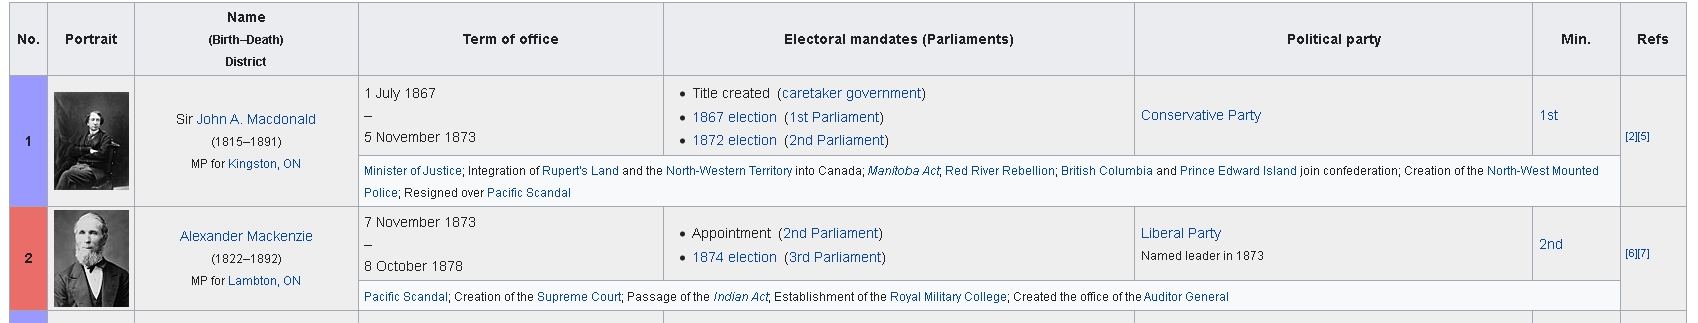

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_prime_ministers_of_Canada"

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, features="html.parser")

In [6]:
#examining HTML file with correct indentation
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of prime ministers of Canada - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9c1a7b5e-9425-44ae-9ee3-a4f0e1fcbb16","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_prime_ministers_of_Canada","wgTitle":"List of prime ministers of Canada","wgCurRevisionId":1056269013,"wgRevisionId":1056269013,"wgArticleId":255823,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","CS1: Julian–Gregorian uncertainty","Articles with

In [7]:
#Getting the table from HTML
tables = soup.find_all('table', class_='wikitable')

#getting the second table with that class
table = tables[1]

# examining that table with correct indentation
print(table.prettify())

<table class="wikitable">
 <tbody>
  <tr>
   <th>
    No.
   </th>
   <th width="75">
    Portrait
   </th>
   <th>
    Name
    <br/>
    <small>
     (Birth–Death)
    </small>
    <br/>
    <small>
     District
    </small>
   </th>
   <th>
    Term of office
   </th>
   <th>
    Electoral mandates (Parliaments)
   </th>
   <th>
    Political party
   </th>
   <th>
    Min.
   </th>
   <th>
    Refs
   </th>
  </tr>
  <tr style="background:#eee;">
   <td rowspan="2" style="background:#9999FF; text-align:center">
    <b>
     1
    </b>
   </td>
   <td rowspan="2">
    <div class="center">
     <div class="floatnone">
      <a class="image" href="/wiki/File:Macdonald1872.jpg">
       <img alt="Macdonald1872.jpg" data-file-height="580" data-file-width="442" decoding="async" height="98" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/75px-Macdonald1872.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/113px-Macdonald1872.jpg 

In [8]:
# Trying to split on <tr style="background:#eee;"> 
# Because that is where the most important information lies!
# Do not want the writing under the 4th- 7th column. 

rows =  table.find_all('tr', attrs = {'style' : 'background:#eee;'})

# examining the first row 
print(rows[0].prettify())

<tr style="background:#eee;">
 <td rowspan="2" style="background:#9999FF; text-align:center">
  <b>
   1
  </b>
 </td>
 <td rowspan="2">
  <div class="center">
   <div class="floatnone">
    <a class="image" href="/wiki/File:Macdonald1872.jpg">
     <img alt="Macdonald1872.jpg" data-file-height="580" data-file-width="442" decoding="async" height="98" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/75px-Macdonald1872.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/113px-Macdonald1872.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/150px-Macdonald1872.jpg 2x" width="75"/>
    </a>
   </div>
  </div>
 </td>
 <td rowspan="2" style="text-align:center;">
  Sir
  <a href="/wiki/John_A._Macdonald" title="John A. Macdonald">
   John A. Macdonald
  </a>
  <br/>
  <small>
   (1815–1891)
  </small>
  <br/>
  <small>
   <span class="nowrap">
    MP for
    <a href="/wiki/Kingston_(electoral_district)" titl

In [9]:
# examining rows with a break to visualise content
for row in rows:
    print(row)
    print("-" * 100)

<tr style="background:#eee;">
<td rowspan="2" style="background:#9999FF; text-align:center"><b>1</b>
</td>
<td rowspan="2"><div class="center"><div class="floatnone"><a class="image" href="/wiki/File:Macdonald1872.jpg"><img alt="Macdonald1872.jpg" data-file-height="580" data-file-width="442" decoding="async" height="98" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/75px-Macdonald1872.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/113px-Macdonald1872.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/37/Macdonald1872.jpg/150px-Macdonald1872.jpg 2x" width="75"/></a></div></div>
</td>
<td rowspan="2" style="text-align:center;">Sir <a href="/wiki/John_A._Macdonald" title="John A. Macdonald">John A. Macdonald</a><br/><small>(1815–1891)</small><br/><small><span class="nowrap">MP for <a href="/wiki/Kingston_(electoral_district)" title="Kingston (electoral district)">Kingston, ON</a></span></small>
</td>
<td><span class="

</td></tr>
----------------------------------------------------------------------------------------------------
<tr style="background:#eee;">
<td rowspan="2" style="background:#9999FF; text-align:center"><b>16</b>
</td>
<td rowspan="2"><div class="center"><div class="floatnone"><a class="image" href="/wiki/File:JoeClark.jpg"><img alt="JoeClark.jpg" data-file-height="1102" data-file-width="910" decoding="async" height="91" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5d/JoeClark.jpg/75px-JoeClark.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5d/JoeClark.jpg/113px-JoeClark.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5d/JoeClark.jpg/150px-JoeClark.jpg 2x" width="75"/></a></div></div>
</td>
<td rowspan="2" style="text-align:center;"><a href="/wiki/Joe_Clark" title="Joe Clark">Joe Clark</a><br/><small>(b. 1939)</small><br/><small><span class="nowrap">MP for <a href="/wiki/Yellowhead_(electoral_district)" title="Yellowhead (electoral district)">Yellowh

In [10]:
# no of rows
print(len(rows))

29


## Table Header

In [11]:
#finding the header using 'th' tag
headers = table.find_all("th")

#examining the headers
print(headers)

[<th>No.
</th>, <th width="75">Portrait
</th>, <th>Name<br/><small>(Birth–Death)</small><br/><small>District</small>
</th>, <th>Term of office
</th>, <th>Electoral mandates (Parliaments)
</th>, <th>Political party
</th>, <th>Min.
</th>, <th>Refs
</th>]


In [12]:
#no of columns/headers
len(headers)

8

In [13]:
for title in headers:
    print(title.contents)

['No.\n']
['Portrait\n']
['Name', <br/>, <small>(Birth–Death)</small>, <br/>, <small>District</small>, '\n']
['Term of office\n']
['Electoral mandates (Parliaments)\n']
['Political party\n']
['Min.\n']
['Refs\n']


In [14]:
headers = [v.text.replace('\n', '') for v in headers]
print(headers)

['No.', 'Portrait', 'Name(Birth–Death)District', 'Term of office', 'Electoral mandates (Parliaments)', 'Political party', 'Min.', 'Refs']


###### Headers
Personally, I did not like the names of the columns for length and descriptive reasons so it was decided to call them differently 

In [15]:
# creating a newn columns for the df
pm_headers = ["name","link","dob","start_date","end_date","party"]
print(pm_headers)

# creating a newn columns for the df
territory_headers = ["name", "party","territory"]
print(territory_headers)

['name', 'link', 'dob', 'start_date', 'end_date', 'party']
['name', 'party', 'territory']


## Contents of the Table

In [16]:
# examining rowspan for 
for row in rows:
    #name
    tds = row.find_all('td')
    name =  str(tds[2].text).split('(')[0]
    
    try:
        cells = row.find("td")
        print(name, ' has ', int(cells.attrs["rowspan"]), ' rowspans')
    except KeyError:
        continue

Sir John A. Macdonald  has  2  rowspans
Alexander Mackenzie  has  2  rowspans
Sir John A. Macdonald  has  2  rowspans
Sir John Abbott  has  2  rowspans
Sir John Thompson  has  2  rowspans
Sir Mackenzie Bowell  has  2  rowspans
Sir Charles Tupper  has  2  rowspans
Sir Wilfrid Laurier  has  2  rowspans
Sir Robert Borden  has  3  rowspans
Arthur Meighen  has  2  rowspans
William Lyon Mackenzie King  has  2  rowspans
Arthur Meighen  has  2  rowspans
William Lyon Mackenzie King  has  2  rowspans
R. B. Bennett  has  2  rowspans
William Lyon Mackenzie King  has  2  rowspans
Louis St. Laurent  has  2  rowspans
John Diefenbaker  has  2  rowspans
Lester B. Pearson  has  2  rowspans
Pierre Trudeau  has  2  rowspans
Joe Clark  has  2  rowspans
Pierre Trudeau  has  2  rowspans
John Turner  has  2  rowspans
Brian Mulroney  has  2  rowspans
Kim Campbell  has  2  rowspans
Jean Chrétien  has  2  rowspans
Paul Martin  has  2  rowspans
Stephen Harper  has  2  rowspans
Justin Trudeau  has  2  rowspans


#### Examining Robert Borden

In [17]:
# examining rowspan for Robert Borden 
for row in rows[7:11]:

    # getting all columns beginning with 'td'
    tds = row.find_all('td')
    
    cell = row.find("td")

    try:
        if int(cell.attrs["rowspan"]) == 2:
            print(row.text)
            
        if int(cell.attrs["rowspan"]) == 3:        
            print(row.text)

    except KeyError:
        print(row.text)

    print('-'*60)


7



Sir Wilfrid Laurier(1841–1919)MP for Quebec East, QC

11 July 1896–6 October 1911


1896 election (8th Parliament)
1900 election (9th Parliament)
1904 election (10th Parliament)
1908 election (11th Parliament)

Liberal PartyNamed leader in 1887

8th

[18][19]

------------------------------------------------------------

8



Sir Robert Borden(1854–1937)MP for Halifax, NS until 1917MP for Kings, NS

10 October 1911–11 October 1917


1911 election (12th Parliament)

Conservative Party (historical)Named leader in 1901

9th

[19][20][21]

------------------------------------------------------------

12 October 1917–10 July 1920


1917 election (13th Parliament)

Unionist Party

10th
------------------------------------------------------------

9



Arthur Meighen(1874–1960)MP for Portage la Prairie, MB

10 July 1920–29 December 1921


Appointment (13th Parliament)

National Liberal and Conservative PartyNamed leader in 1920

11th

[22][23]

------------------------------------------

###### Robert Borden causing trouble


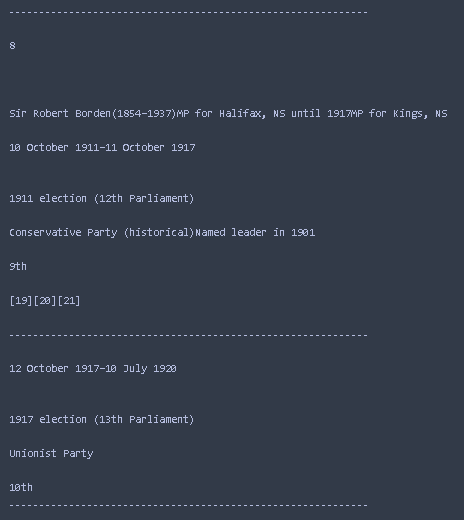


In [18]:
# examining rowspan for Robert Borden 
for row in rows[7:11]:

    # getting all columns beginning with 'td'
    tds = row.find_all('td')
    
    cell = row.find("td")

    try:
        if int(cell.attrs["rowspan"]) == 2:
            print(tds[2].text)
            print(tds[3].text)
            print(tds[5].text)
            
        if int(cell.attrs["rowspan"]) == 3:   
            print(tds[2].text)
            print(tds[3].text)
            print(tds[5].text)
            

    except KeyError:
        print(tds[0].text)
        print(tds[2].text)

    print('-'*60)

Sir Wilfrid Laurier(1841–1919)MP for Quebec East, QC

11 July 1896–6 October 1911

Liberal PartyNamed leader in 1887

------------------------------------------------------------
Sir Robert Borden(1854–1937)MP for Halifax, NS until 1917MP for Kings, NS

10 October 1911–11 October 1917

Conservative Party (historical)Named leader in 1901

------------------------------------------------------------
12 October 1917–10 July 1920

Unionist Party

------------------------------------------------------------
Arthur Meighen(1874–1960)MP for Portage la Prairie, MB

10 July 1920–29 December 1921

National Liberal and Conservative PartyNamed leader in 1920

------------------------------------------------------------


####  Extracting all the information and saving it to pm_table and terriroty_table in pmDB 

In [19]:
#creating a dataframe with columns
pm_df = pd.DataFrame(columns = pm_headers)

territory_df = pd.DataFrame(columns = territory_headers)

In [20]:
for row in rows:

    # getting all columns beginning with 'td'
    tds = row.find_all('td')
    
    cell = row.find("td")

    # =================================
    # Where rowspan is 2 
    # =================================
    try:
        if int(cell.attrs["rowspan"]) == 2:
        # =================================
        # Name
        # =================================
            # Name is before the '(' so the tds[2].text needs to split on '(' 
            name =  str(tds[2].text).split('(')[0]

        # =================================
        # Party
        # =================================
            party = str(tds[5].text.replace('\n', ''))
            if ' in ' in party:
                party = party.split('Named')[0]            
            
        # =================================
        # Territory
        # =================================

            # territory needs to be split on the second bracket

            territory_Str =  str(tds[2].text).split(')')[1]
            

            # territory has 'MP for Kingston, ON' Needs to be split on the 'for'
            if ' for ' in territory_Str:
                
                if 'Senator ' in territory_Str:
                    city = territory_Str.split(' for ')[1]
                    city = city.replace('\n', '')
                    if 'Quebec' in city:
                        territory = 'QC'
                    elif 'Ontario' in city:
                        territory = 'ON'
                    territory_values = [name, party, territory]
                    territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                    with DBcm.UseDatabase(config) as cursor:
                        cursor.execute(insert_territory_SQL, (name, party, territory))
                else:
                    territory =  tds[2].find_all('span', class_ = 'nowrap')
                    for i in territory: 
                        i = str(i.text)
                        
                        if ' until ' in i:
                            location = i.split(' for ')[1].split(' until ')[0].split(', ')
                            city = location[0]
                            territory = location[1]
                            territory_values = [name, party, territory]
                            territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                            with DBcm.UseDatabase(config) as cursor:
                                cursor.execute(insert_territory_SQL, (name, party, territory))

                        else:
                            location = i.split(' for ')[1]. split(', ')
                            city = location[0]
                            territory = location[1]

                            territory_values = [name, party, territory]
                            territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                            with DBcm.UseDatabase(config) as cursor:
                                cursor.execute(insert_territory_SQL, (name, party, territory))
                        
            # Sir Charles Tupper and John Turner did not serve in Parliament while Prime Minister
            else: 
                
                territory = 'Did not serve in Parliament while Prime Minister'
                territory_values = [name, party, territory]
                territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                with DBcm.UseDatabase(config) as cursor:
                    cursor.execute(insert_territory_SQL, (name, party, territory))
        # =================================
        # Link
        # =================================

            # extracting the link for each prime minister
            # <a href="/wiki/John_A._Macdonald" title="John A. Macdonald">John A. Macdonald</a>
            link = str(tds[2].a.get("href"))
            link = 'https://en.wikipedia.org' + link


        
        # =================================
        # Date of Birth
        # =================================
            # using the wikipedia link up above, the algorithm enters the wikipage about each PM and scraps the DOB
            dob_response = requests.get(link)
            dob_content = dob_response.content
            dob_soup = BeautifulSoup(dob_content, features="html.parser")

            # gets the table relevant informat
            dob_table = dob_soup.find('table', class_='infobox vcard')

            # looking for text 'BORN' 
            born_string = dob_table.find(text = 'Born')
            # looking for the next td related to born
            dob_td = born_string.find_next("td")  

            #creating a string
            dob = str(dob_td.text)

            # if the string contains 'or '
            if ' or ' in dob:
                dob = dob.split('[b]')[0].split('[a]')[1]

                dob = dob.split(' or ')[1]

                # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
                f_date1 = "%d %B %Y" # 11 January 1815

                try:
                    dob = datetime.strptime(dob, f_date1)
                    dob = dob.date()
                except  ValueError:
                    pass

            elif '(' in dob: 
                dob = dob.split(')')[0].split('(')[1]    

                # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
                f_date2 = "%Y-%m-%d" #  1822-01-28
                try:
                    dob = datetime.strptime(dob, f_date2)
                    dob = dob.date()
                except  ValueError:
                    pass

        # =================================
        # Start and End Date
        # =================================
        
            # dates look like this '1 July 1867–5 November 1873' so they need to be split
            # start of term is the first date in the string, so split on the '-'

            start_date = str(tds[3].text).split('–')[0]

            # end of term is the last date in the string, so split on the '-' 
            end_date = str(tds[3].text).split('–')[1]

            # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
            f = "%d %B %Y" # 8 November 1984
            f1 = "%d %B %Y\n"

            try:
                start_date = datetime.strptime(start_date, f)
                start_date = start_date.date()
                
                # Trudeau is still serving as PM so today's date is assumed as last day 
                if 'Incumbent' in end_date:
                    end_date = datetime.today()
                    end_date = end_date.date()
                else:
                    end_date = datetime.strptime(end_date, f1)
                    end_date = end_date.date()

            # some dates have normal dates like '5 November 1873' and are easy to pass
            # date has '29/30 June[*] 1984' so the dates need to be split on '/' 
            # and '[*]' needs to be replaced as ''
               
            except  ValueError:
                end_date = end_date.split('/')[1]
                end_date = end_date.replace('[*] ', ' ')
                end_date = datetime.strptime(end_date, f1)
                end_date = end_date.date()
                

    # =================================
    # Where rowspan is 3
    # =================================  
        if int(cell.attrs["rowspan"]) == 3:   
        # =================================
        # Name
        # =================================
            # Name is before the '(' so the tds[2].text needs to split on '(' 
            name =  str(tds[2].text).split('(')[0]
            
        # =================================
        # Party
        # =================================
            party = str(tds[5].text.replace('\n', ''))
            if ' in ' in party:
                party = party.split('Named')[0]
            
        # =================================
        # Territory
        # =================================

            # territory needs to be split on the second bracket

            territory_Str =  str(tds[2].text).split(')')[1]
            

            # territory has 'MP for Kingston, ON' Needs to be split on the 'for'
            if ' for ' in territory_Str:
                
                if 'Senator ' in territory_Str:
                    city = territory_Str.split(' for ')[1]
                    city = city.replace('\n', '')
                    if 'Quebec' in city:
                        territory = 'QC'
                    elif 'Ontario' in city:
                        territory = 'ON'
                    territory_values = [name, party, territory]
                    territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                    with DBcm.UseDatabase(config) as cursor:
                        cursor.execute(insert_territory_SQL, (name, party, territory))

                else:
                    territory =  tds[2].find_all('span', class_ = 'nowrap')
                    for i in territory: 
                        i = str(i.text)
                        
                        if ' until ' in i:
                            location = i.split(' for ')[1].split(' until ')[0].split(', ')
                            city = location[0]
                            territory = location[1]
                            territory_values = [name, party, territory]
                            territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                            with DBcm.UseDatabase(config) as cursor:
                                cursor.execute(insert_territory_SQL, (name, party, territory))
                        else:
                            location = i.split(' for ')[1]. split(', ')
                            city = location[0]
                            territory = location[1]
                            territory_values = [name, party, territory]
                            territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
                            with DBcm.UseDatabase(config) as cursor:
                                cursor.execute(insert_territory_SQL, (name, party, territory))
                        
            # Sir Charles Tupper and John Turner did not serve in Parliament while Prime Minister
            else: 
                city = 'Na'
                territory = 'Did not serve in Parliament while Prime Minister'
        
        # =================================
        # Link
        # =================================

            # extracting the link for each prime minister
            # <a href="/wiki/John_A._Macdonald" title="John A. Macdonald">John A. Macdonald</a>
            link = str(tds[2].a.get("href"))
            link = 'https://en.wikipedia.org' + link


        
        # =================================
        # Date of Birth
        # =================================
            # using the wikipedia link up above, the algorithm enters the wikipage about each PM and scraps the DOB
            dob_response = requests.get(link)
            dob_content = dob_response.content
            dob_soup = BeautifulSoup(dob_content, features="html.parser")

            # gets the table relevant informat
            dob_table = dob_soup.find('table', class_='infobox vcard')

            # looking for text 'BORN' 
            born_string = dob_table.find(text = 'Born')
            # looking for the next td related to born
            dob_td = born_string.find_next("td")  

            #creating a string
            dob = str(dob_td.text)

            # if the string contains 'or '
            if ' or ' in dob:
                dob = dob.split('[b]')[0].split('[a]')[1]

                dob = dob.split(' or ')[1]

                # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
                f_date1 = "%d %B %Y" # 11 January 1815

                try:
                    dob = datetime.strptime(dob, f_date1)
                    dob = dob.date()
                except  ValueError:
                    pass

            elif '(' in dob: 
                dob = dob.split(')')[0].split('(')[1]    

                # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
                f_date2 = "%Y-%m-%d" #  1822-01-28
                try:
                    dob = datetime.strptime(dob, f_date2)
                    dob = dob.date()
                except  ValueError:
                    pass

        # =================================
        # Start and End Date
        # =================================
        
            # dates look like this '1 July 1867–5 November 1873' so they need to be split
            # start of term is the first date in the string, so split on the '-'

            start_date = str(tds[3].text).split('–')[0]

            # end of term is the last date in the string, so split on the '-' 
            end_date = str(tds[3].text).split('–')[1]

            # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
            f = "%d %B %Y" # 8 November 1984
            f1 = "%d %B %Y\n"

            try:
                start_date = datetime.strptime(start_date, f)
                start_date = start_date.date()
                
                # Trudeau is still serving as PM so today's date is assumed as last day 
                if 'Incumbent' in end_date:
                    end_date = datetime.today()
                    end_date = end_date.date()
                else:
                    end_date = datetime.strptime(end_date, f1)
                    end_date = end_date.date()

            # some dates have normal dates like '5 November 1873' and are easy to pass
            # date has '29/30 June[*] 1984' so the dates need to be split on '/' 
            # and '[*]' needs to be replaced as ''
               
            except  ValueError:
                end_date = end_date.split('/')[1]
                end_date = end_date.replace('[*] ', ' ')
                end_date = datetime.strptime(end_date, f1)
                end_date = end_date.date()
                

        

    except KeyError:
        

    # =================================
    # Start and End Date
    # =================================

        # dates look like this '1 July 1867–5 November 1873' so they need to be split
        # start of term is the first date in the string, so split on the '-'

        start_date = str(tds[0].text).split('–')[0]

        # end of term is the last date in the string, so split on the '-' 
        end_date = str(tds[0].text).split('–')[1]

        # pandas and SQL need to know that start_date and end_date are dates so it needs to parsed.
        f = "%d %B %Y" # 8 November 1984
        f1 = "%d %B %Y\n"

        try:
            start_date = datetime.strptime(start_date, f)
            start_date = start_date.date()

            # Trudeau is still serving as PM so today's date is assumed as last day 
            if 'Incumbent' in end_date:
                end_date = datetime.today()
                end_date = end_date.date()
            else:
                end_date = datetime.strptime(end_date, f1)
                end_date = end_date.date()

        # some dates have normal dates like '5 November 1873' and are easy to pass
        # date has '29/30 June[*] 1984' so the dates need to be split on '/' 
        # and '[*]' needs to be replaced as ''

        except  ValueError:
            end_date = end_date.split('/')[1]
            end_date = end_date.replace('[*] ', ' ')
            end_date = datetime.strptime(end_date, f1)
            end_date = end_date.date()

    # =================================
    # Party
    # =================================
        party = str(tds[2].text.replace('\n', ''))
        if ' in ' in party:
            party = party.split('Named')[0]
            territory_values = [name, party, territory]
            territory_df = territory_df.append(pd.Series(territory_values, index = territory_headers), ignore_index = True)
            with DBcm.UseDatabase(config) as cursor:
                cursor.execute(insert_territory_SQL, (name, party, territory))
                
    print(f"{name},{link}, {dob}, {start_date}, {end_date}, {party}")

    pm_values = [name, link, dob, start_date, end_date, party]

    pm_df = pm_df.append(pd.Series(pm_values, index = pm_headers), ignore_index = True)

    #insert data into the SQL table 
    with DBcm.UseDatabase(config) as cursor:
        cursor.execute(insert_pm_SQL, (name, link, dob, start_date, end_date, party))


MP for Kingston, ON



CredentialsError: 1045 (28000): Access denied for user 'kjuser'@'localhost' (using password: YES)

In [ ]:
# examine the structure of each dataframe
pm_df.info()
territory_df.info()

In [ ]:
# examining the territory dataframe
territory_df.head(40)

In [ ]:
# examining the prime minister dataframe
pm_df.head(30)

In [ ]:
# # it is possible to save each one to csv file but unnecessary   
# pm_df.to_csv(r"pm_df.csv", index =  False)
# territory_df.to_csv(r"territory_df.csv", index =  False)

## Answering Q3

In [ ]:
# creating a function to pass into the dataset
def sql_code(x):
    with DBcm.UseDatabase(config) as cursor:
        cursor.execute(x)
        data = cursor.fetchall()

    for row in data:
        print(row)

##  (a) Which political party has produced the most individual prime ministers? [2]
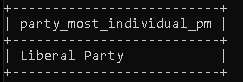

In [ ]:
# answering the question in SQL
a_SQL = """
        SELECT party AS party_most_individual_pm FROM
        (SELECT COUNT( DISTINCT name) as count_name, party
        FROM pm_table
        GROUP BY party
        ORDER BY count_name DESC
        LIMIT 1)a;
        """

print('The political party that has produced the most individual prime ministers is:')
sql_code(a_SQL)

## (b) Provide a list of prime ministers who served by province/territory. [3]

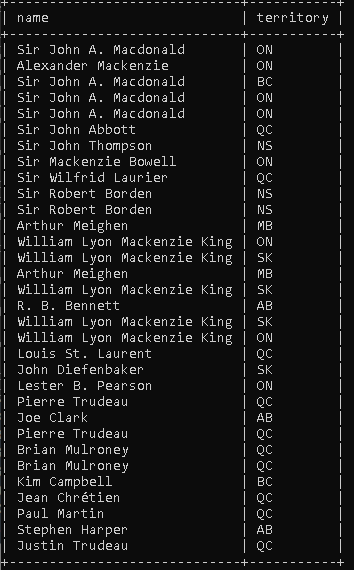

Two PM did not serve Parliament while PM and didnt have a territory. 
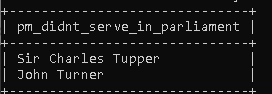

In [ ]:
# answering the question in SQL

b_SQL = """
        SELECT name, territory
        FROM territory_table
        WHERE NOT territory = "Did not serve in Parliament while Prime Minister";
        """
print('A list of prime ministers who served by province/territory.')
sql_code(b_SQL)


In [ ]:
no_territory_SQL = """
        SELECT name as pm_didnt_serve_in_parliament FROM
        (SELECT name, territory
        FROM territory_table
        WHERE territory = "Did not serve in Parliament while Prime Minister")a;
        """
print("A list of prime ministers who not serve in Parliament while Prime Minister")
sql_code(no_territory_SQL)

##  (c) Which political party held the office of prime minister for the longest amount of overall time, and for how long? [3]
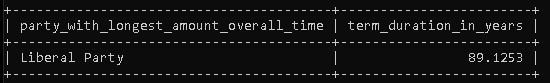

In [ ]:
# answering the question in SQL
c_SQL = """
        
        SELECT party as party_with_longest_amount_overall_time, SUM(DATEDIFF(end_date, start_date)) / 365.25 AS term_duration_in_years
        FROM pm_table
        GROUP BY party
        ORDER BY  term_duration_in_years DESC
        LIMIT 1;
        """

# The political party held the office of prime minister for the longest amount of overall time, 
# and duration:
print('The plitical party held the office of prime minister for the longest amount of overall time, and duration:' )
sql_code(c_SQL)

##  (d) Which individual politician held the office of prime minister for the longest amount of uninterrupted time, and for how long? [2]

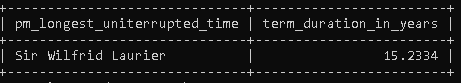

In [ ]:
# answering the question in SQL
d_SQL = """
        SELECT name AS pm_longest_uniterrupted_time, term_duration_in_years FROM
        (SELECT name, term_duration_in_years, IF(name = next_name, "YES", "NO") AS uninterrupted FROM
        (SELECT name, LEAD(name) OVER(ORDER BY id) AS next_name, DATEDIFF(end_date, start_date)/365.25 AS term_duration_in_years 
        FROM pm_table)a
        ORDER BY term_duration_in_years DESC
        LIMIT 1)B; 
        
        """
# individual politician held the office of 
# prime minister for the longest amount of uninterrupted time, and for how long
print('Individual politician held the office of  prime minister for the longest amount of uninterrupted time, and for how long')
sql_code(d_SQL)

## (e) Which individual politician has held the office of prime ministers for the longest amount of overall time? [1]
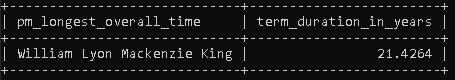

In [ ]:
# answering the question in SQL
e_SQL =  """
        SELECT name AS pm_longest_overall_time, term_duration_in_years FROM
        (SELECT name, SUM(DATEDIFF(end_date, start_date))/365.25 AS term_duration_in_years
        FROM pm_table
        GROUP BY name
        ORDER BY term_duration_in_years DESC
        LIMIT 1)A;
        """

# The individual politician who has held the office of prime ministers 
# for the longest amount of overall time is:

print('The individual politician who has held the office of prime ministers  for the longest amount of overall time is: ')
sql_code(e_SQL)

## (f) Which individual politician held the office of prime minister for the shortest amount of overall time, and for how long? [1]
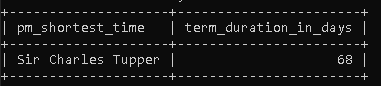

In [ ]:
# answering the question in SQL
f_SQL = """
        SELECT name AS pm_shortest_time, SUM(DATEDIFF(end_date, start_date)) AS term_duration_in_days
        FROM pm_table
        GROUP BY name
        ORDER BY term_duration_in_days
        LIMIT 1;
        """


# The individual politician who has held the office of prime ministers 
#  for the shortest amount of overall time, and duration:

print('The individual politician who has held the office of prime ministers for the shortest amount of overall time, and duration:')
sql_code(f_SQL)

## (g) What age was each prime minister on the day they assumed office? [4]
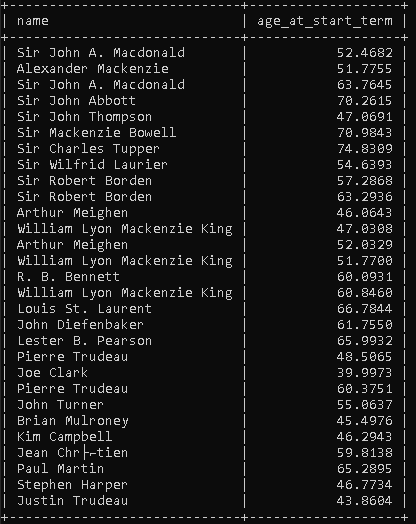

In [ ]:
# answering the question in SQL
g_SQL = """
        SELECT name, DATEDIFF(start_date, dob)/365.25 AS age_at_start_term 
        FROM pm_table
        ORDER BY id;
        """
# The age was each prime minister on the day they assumed office
sql_code(g_SQL)

## (h) On the last day of their term of office, which politician was the oldest? [1]
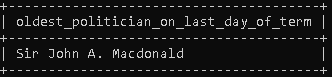

In [ ]:
# answering the question in SQL
h_SQL = """
        SELECT name AS oldest_politician_on_last_day_of_term FROM
        (SELECT name, DATEDIFF(end_date, dob)/365 AS age_end_date
        FROM pm_table
        ORDER BY age_end_date DESC
        LIMIT 1)A;
        """

# On the last day of their term of office, the oldest politician was: 
print('On the last day of their term of office, the oldest politician was: ')
sql_code(h_SQL)

## (i) In your view, and based on statistics calculated from your scraped data, which political party is the most successful? Show and describe your reasoning. [3]

</br>

#### Answer: the Liberal Party is the most successful party. 

###### It produced the most amount of  most individual prime ministers.
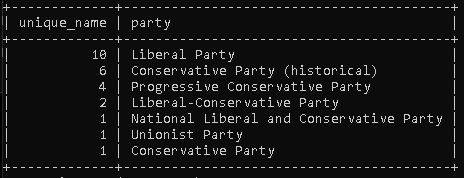

###### It produced the most amount of  most  prime ministers overall.

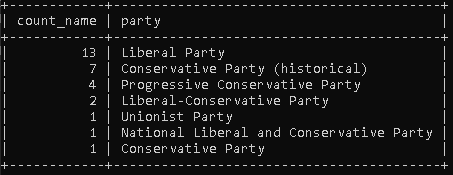

###### It has also served the most amount of time in office 
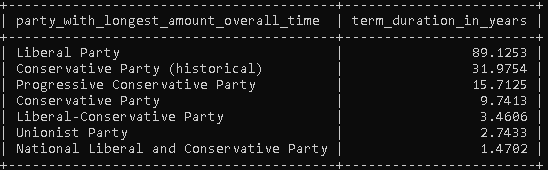

###### It has the second-highest amount of PMs from unique territories. 
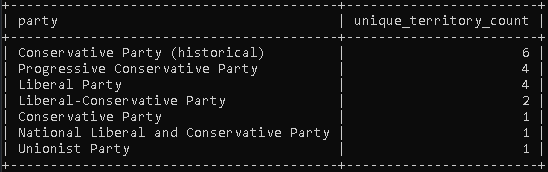

In [ ]:
# answering the question in SQL
unique_name_SQL = """
        SELECT COUNT( DISTINCT name) as unique_name, party
        FROM pm_table
        GROUP BY party
        ORDER BY unique_name DESC;
        """

print('The political party that has produced the most individual prime ministers is:')
sql_code(unique_name_SQL)

In [ ]:
# answering the question in SQL
count_name_SQL = """
        SELECT COUNT(name) as count_name, party
        FROM pm_table
        GROUP BY party
        ORDER BY count_name DESC;
        """

print('The political party that has produced the most individual prime ministers is:')
sql_code(count_name_SQL)

In [ ]:
# answering the question in SQL
party_overall_time_SQL = """
        SELECT party as party_with_longest_amount_overall_time, SUM(DATEDIFF(end_date, start_date)) / 365.25 AS term_duration_in_years
        FROM pm_table
        GROUP BY party
        ORDER BY  term_duration_in_years DESC;
        """

# The political party held the office of prime minister for the longest amount of overall time, 
# and duration:
print('The plitical party held the office of prime minister for the longest amount of overall time, and duration:' )
sql_code(party_overall_time_SQL)

In [ ]:
# answering the question in SQL

unique_territory_party_SQL = """
        SELECT party, COUNT(DISTINCT territory) as unique_territory_count
        FROM territory_table
        GROUP BY party
        ORDER BY unique_territory_count DESC;
        """

sql_code(unique_territory_party_SQL)

In [ ]:
# answering the question in SQL

territories_party_SQL = """
        SELECT party, COUNT(territory) as territory_count
        FROM territory_table
        GROUP BY party
        ORDER BY territory_count DESC;
        """

sql_code(territories_party_SQL)

## Caution!
Remember to delete pmDB and drop the user